In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [23]:
dataset = pd.read_csv('Fuel_Data.csv')

dataset.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [24]:
dataset = dataset.drop(['MAKE', 'MODEL','TRANSMISSION'], axis = 1)
dataset.head()

,YEAR,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,COMPACT,1.6,4,X,9.2,6.7,8.1,35,186
1,2000,COMPACT,1.6,4,X,8.5,6.5,7.6,37,175
2,2000,MID-SIZE,3.2,6,Z,12.2,7.4,10.0,28,230
3,2000,MID-SIZE,3.5,6,Z,13.4,9.2,11.5,25,264
4,2000,SUBCOMPACT,1.8,4,X,10.0,7.0,8.6,33,198


In [25]:
dataset = pd.get_dummies(dataset, columns=['FUEL', 'VEHICLE CLASS'], prefix='', prefix_sep='', dtype=float)
dataset.head()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,D,E,...,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,TWO-SEATER,Two-seater,VAN - CARGO,VAN - PASSENGER,Van: Passenger
0,2000,1.6,4,9.2,6.7,8.1,35,186,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1.6,4,8.5,6.5,7.6,37,175,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,3.2,6,12.2,7.4,10.0,28,230,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,3.5,6,13.4,9.2,11.5,25,264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1.8,4,10.0,7.0,8.6,33,198,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [27]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,18045.0,2011.561153,6.272951,2000.0,2006.0,2012.0,2017.0,2022.0
ENGINE SIZE,18045.0,3.353344,1.334836,0.8,2.3,3.0,4.2,8.4
CYLINDERS,18045.0,5.848933,1.814774,2.0,4.0,6.0,8.0,16.0
FUEL CONSUMPTION,18045.0,12.754231,3.499185,3.5,10.4,12.3,14.7,30.6
HWY (L/100 km),18045.0,8.914647,2.274733,3.2,7.3,8.4,10.2,20.9
COMB (L/100 km),18045.0,11.027382,2.909838,3.6,9.1,10.5,12.7,26.1
COMB (mpg),18045.0,27.398393,7.418175,11.0,22.0,27.0,31.0,78.0
EMISSIONS,18045.0,249.821834,59.119832,83.0,209.0,242.0,288.0,608.0
D,18045.0,0.014298,0.118718,0.0,0.0,0.0,0.0,1.0
E,18045.0,0.048157,0.214105,0.0,0.0,0.0,0.0,1.0


In [29]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('EMISSIONS')
test_labels = test_features.pop('EMISSIONS')

In [31]:
# Normalization
# Create the layer:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [32]:
# Normalize data
normalizer.adapt(np.array(train_features))

In [39]:
first_row = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first_row[0][:7])
  print()
  print('Normalized:', normalizer(first_row).numpy()[0][:7])

First example: [2003.     1.5    4.     8.3    6.     7.3   39. ]

Normalized: [-1.36 -1.39 -1.02 -1.27 -1.28 -1.28  1.56]


In [40]:
# Linear Regression

'''
Let's try to predict emissions with Fuel Consumption
'''

Fuel_Consumption = np.array(train_features['FUEL CONSUMPTION'])

Fuel_Consumption_normalizer = layers.Normalization(input_shape=[1,], axis=None)
Fuel_Consumption_normalizer.adapt(Fuel_Consumption)

c:\Users\miloc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
# Build the Keras model

Fuel_Consumption_model = tf.keras.Sequential([
    Fuel_Consumption_normalizer,
    layers.Dense(units=1)
])

Fuel_Consumption_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [43]:
Fuel_Consumption_model.predict(Fuel_Consumption[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


array([[ 0.7242009 ],
       [ 0.74045974],
       [ 0.5290963 ],
       [ 0.09011097],
       [-0.18628721],
       [ 0.00881737],
       [ 0.04133477],
       [ 0.4640615 ],
       [-0.9504471 ],
       [ 0.15514576]], dtype=float32)

In [44]:
Fuel_Consumption_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [45]:
history = Fuel_Consumption_model.fit(
    train_features['FUEL CONSUMPTION'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [47]:
# history of losses
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,val_loss,epoch
0,54361.996094,43897.144531,0
1,35875.324219,28567.376953,1
2,22953.935547,17846.441406,2
3,13991.394531,10525.654297,3
4,8003.732422,5788.910156,4


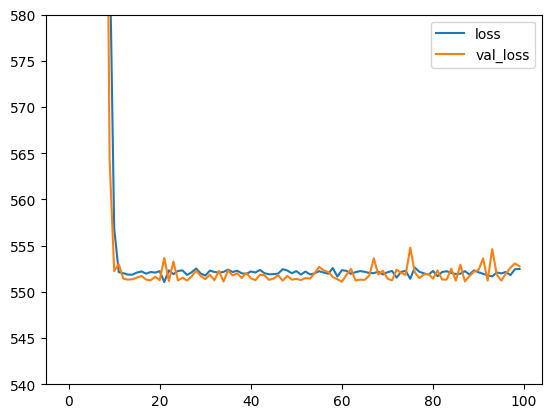

In [78]:
plt.plot(hist['loss'], label = 'loss')
plt.plot(hist['val_loss'], label = 'val_loss')
plt.ylim(540,580)
plt.legend()

In [54]:
test_results = {}

test_results['Fuel_Consumption_model'] = Fuel_Consumption_model.evaluate(
    test_features['FUEL CONSUMPTION'],
    test_labels, verbose=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


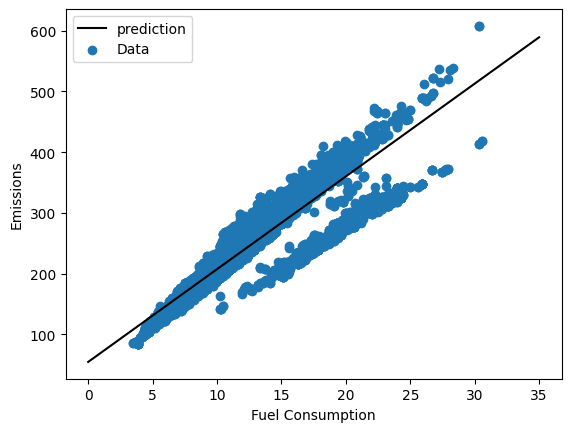

In [61]:
x = tf.linspace(0.0, 35, 36)
y = Fuel_Consumption_model.predict(x)

plt.plot(x,y, label = 'prediction', color = 'k')
plt.scatter(train_features['FUEL CONSUMPTION'], train_labels, label = 'Data')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.legend()
plt.show()

### Multivariate Linear Regression

In [62]:
# For each feature, we'll need to normalize it and tehn pass it through a regression layer

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [63]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[-1.0120002 ],
       [-1.0112964 ],
       [-1.0223308 ],
       [ 2.1378698 ],
       [-0.59066623],
       [-0.9189481 ],
       [-0.3640445 ],
       [ 0.28935868],
       [ 1.8208166 ],
       [-0.53145295]], dtype=float32)

In [64]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [65]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Show logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58493.8711 - val_loss: 42908.8438
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 38826.3438 - val_loss: 28120.9785
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25107.9102 - val_loss: 17443.3555
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15350.9189 - val_loss: 10081.8584
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8704.8770 - val_loss: 5316.5254
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4479.1724 - val_loss: 2492.1794
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2013.9254 - val_loss: 1003.2523
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 784.5688 - val_loss: 337.9344
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 250.3362 - val_loss: 100.6350
Epoch 10/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.8064 - val_loss: 36.6150
Epoch 11/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.3210

(0.0, 60.0)

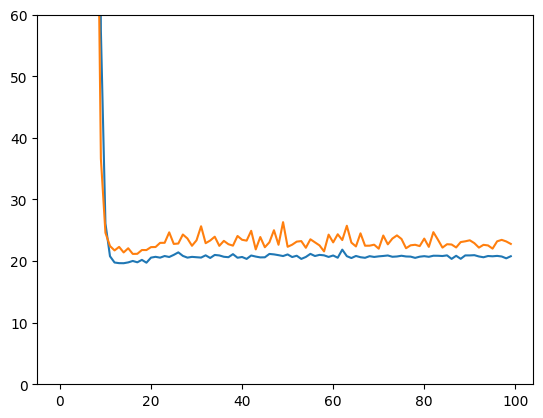

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,60)

In [79]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

### Deep Neural Network with 1 input

In [80]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [81]:
dnn_Fuel_Consumption_model = build_and_compile_model(Fuel_Consumption_normalizer)

In [82]:
dnn_Fuel_Consumption_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [83]:
history = dnn_Fuel_Consumption_model.fit(
    train_features['FUEL CONSUMPTION'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

(0.0, 20.0)

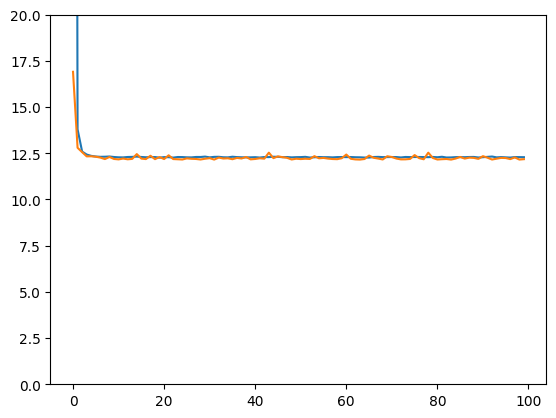

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


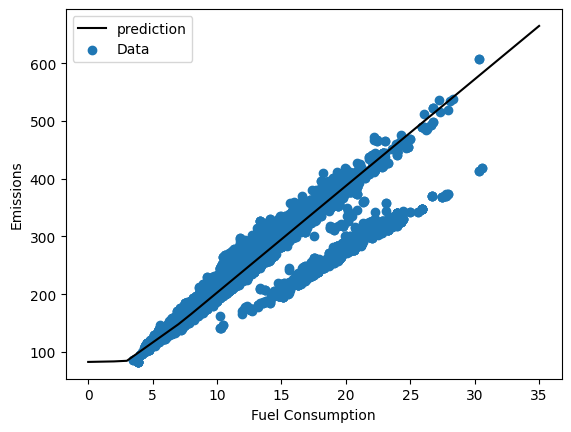

In [86]:
x = tf.linspace(0.0, 35, 36)
y = dnn_Fuel_Consumption_model.predict(x)

plt.plot(x,y, label = 'prediction', color = 'k')
plt.scatter(train_features['FUEL CONSUMPTION'], train_labels, label = 'Data')
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.legend()
plt.show()

In [87]:
test_results['dnn_Fuel_Consumption_model'] = dnn_Fuel_Consumption_model.evaluate(
    test_features['FUEL CONSUMPTION'], test_labels,
    verbose=0)

### DNN with multiple inputs

In [88]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (10, 44)               │            89 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (360.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 89 (360.00 B)

In [89]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

(0.0, 8.0)

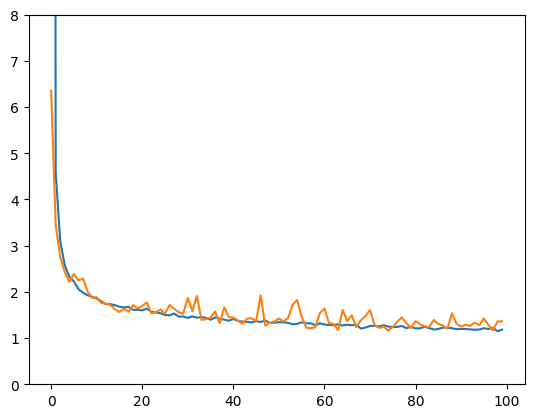

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,8)

In [93]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [95]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
Fuel_Consumption_model,533.484070
linear_model,22.185230
dnn_Fuel_Consumption_model,11.806746
dnn_model,1.416400


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


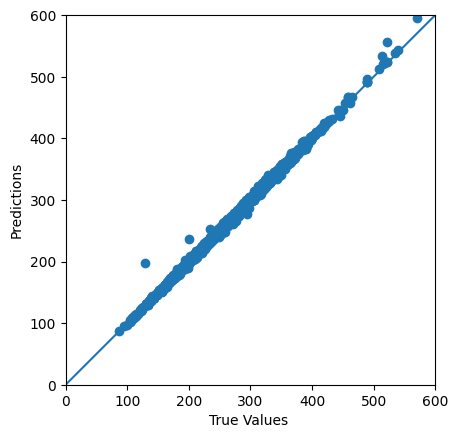

In [98]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


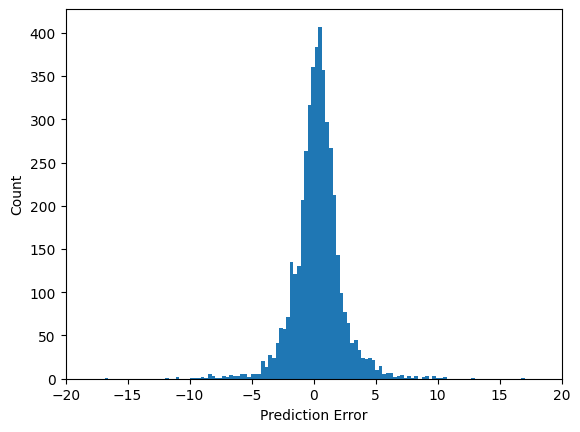

In [105]:
error = test_predictions - test_labels
plt.hist(error, bins=300)
plt.xlim(-20,20)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [106]:
dnn_model.save('dnn_model.keras')